In [1]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!pip install tensorflow-addons




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 6.8 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
import tensorflow as tf
import tensorflow.keras as tk
import tensorflow_addons as tfa

In [ ]:
import torch, torchvision
import matplotlib.pyplot as plt
import json
import cv2
import numpy as np
from copy import deepcopy

In [ ]:
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# !ln -s /content/gdrive/My\ Drive/ /mydrive
# !ls /mydrive

In [ ]:
# install dependencies:
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch
import torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Cloning into 'detectron2'...
remote: Enumerating objects: 15188, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 15188 (delta 117), reused 116 (delta 67), pack-reused 14979
Receiving objects: 100% (15188/15188), 6.21 MiB | 4.78 MiB/s, done.
Resolving deltas: 100% (10986/10986), done.
Updating files: 100% (820/820), done.
  Using cached pycocotools-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (426 kB)
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0


In [ ]:
# install dependencies:
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch
import torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.5 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution found for torch==1.5
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-bcqpi8z1
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-bcqpi8z1
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=332083 sha256=1ddfc5760c5172871e5710a2f884ed9b6fb2bbd479d7ef1b9e9cbf6b9b723b09
  Stored in directory: /tmp/pip-ephem-wheel-cache-5bbk13la/wheels/39/61/b4/480fbddb4d3d6bc34083e7397bc6f5d1381f79acc68e9f3511
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Foun

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.0 ; cuda:  cu118
detectron2: 0.6


In [ ]:
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.structures.image_list import ImageList
from detectron2.data import transforms as T
from detectron2.modeling.box_regression import Box2BoxTransform
from detectron2.modeling.roi_heads.fast_rcnn import FastRCNNOutputLayers
from detectron2.structures.boxes import Boxes
from detectron2.layers import nms
from detectron2 import model_zoo
from detectron2.config import get_cfg

In [ ]:
print(torch.__version__, torch.cuda.is_available())

2.0.1+cu118 True


In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog,DatasetCatalog

In [ ]:

from detectron2.data.datasets import register_coco_instances # as detectron2 accepts data in json format same as coco
register_coco_instances("training_dataset13", {}, "/content/gdrive/MyDrive/latest_dataset/train.json", "/content/gdrive/MyDrive/latest_dataset/new_train/images") # Registering every instances in experiment which contains json output of the training data.
# register_coco_instances("val_dataset", {}, "/content/gdrive/starred/Updated_dataset/Tuhinangshu/latest_dataset/valid.json", "/content/gdrive/MyDrive/Updated_dataset/Tuhinangshu/latest_dataset/new_valid/images") # Registering every instances in experiment which contains json output of the training data.
register_coco_instances("test_dataset13", {}, "/content/gdrive/MyDrive/latest_dataset/test.json", "/content/gdrive/MyDrive/latest_dataset/new_test/images") # Registering every instances in experiment which contains json output of the training data.


In [ ]:
%cd /content/gdrive/MyDrive/latest_dataset
sample_metadata = MetadataCatalog.get("training_dataset13") # To get the image

%cd /content/gdrive/MyDrive/latest_dataset
dataset_dicts = DatasetCatalog.get("training_dataset13") # To capture the annotations

/content/gdrive/.shortcut-targets-by-id/1p91C9tFDSRmqXC_G8CCGK4iwWEoXYcvK/latest_dataset
/content/gdrive/.shortcut-targets-by-id/1p91C9tFDSRmqXC_G8CCGK4iwWEoXYcvK/latest_dataset
[08/25 11:14:25 d2.data.datasets.coco]: Loading /content/gdrive/MyDrive/latest_dataset/train.json takes 2.34 seconds.
WARNING [08/25 11:14:25 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[08/25 11:14:25 d2.data.datasets.coco]: Loaded 9617 images in COCO format from /content/gdrive/MyDrive/latest_dataset/train.json


In [ ]:
%cd /content/gdrive/MyDrive/latest_dataset
sample_metadata1 = MetadataCatalog.get("test_dataset14") # To get the image

%cd /content/gdrive/MyDrive/latest_dataset
dataset_dicts1 = DatasetCatalog.get("test_dataset14") # To capture the annotations

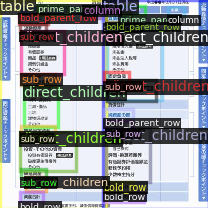

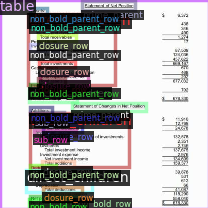

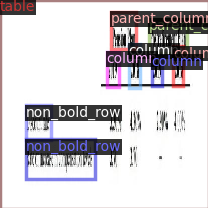

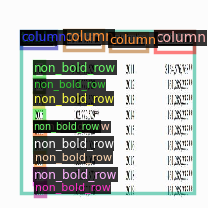

In [ ]:
import random

for d in random.sample(dataset_dicts, 4):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=sample_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
contrastive_loss = tfa.losses.ContrastiveLoss()

In [ ]:
import torch.nn as nn

In [ ]:
import torch
import torch.nn as nn

class SupConLossWithMultiHeadAttention(nn.Module):
    def __init__(self, temperature=0.07, contrast_mode='all', base_temperature=0.07,
                 embed_dim=256, num_heads=8):
        super(SupConLossWithMultiHeadAttention, self).__init__()
        self.temperature = temperature
        self.contrast_mode = contrast_mode
        self.base_temperature = base_temperature
        self.embed_dim = embed_dim
        self.num_heads = num_heads


        self.multihead_attention = MultiHeadAttention(embed_dim, num_heads)

    def forward(self, features, labels=None, mask=None):
        """Args:
            features: hidden vector of shape [bsz, n_views, ...].
            labels: ground truth of shape [bsz].
            mask: contrastive mask of shape [bsz, bsz], mask_{i,j}=1 if sample j
                has the same class as sample i. Can be asymmetric.
        Returns:
            A loss scalar.
        """
        device = (torch.device('cuda')
                  if features.is_cuda
                  else torch.device('cpu'))

        # Apply multi-head attention to the input features
        attended_features = self.multihead_attention(features)

        if len(features.shape) < 3:
            raise ValueError('`features` needs to be [bsz, n_views, ...],'
                             'at least 3 dimensions are required')
        if len(features.shape) > 3:
            features = features.view(features.shape[0], features.shape[1], -1)

        batch_size = features.shape[0]
        if labels is not None and mask is not None:
            raise ValueError('Cannot define both `labels` and `mask`')
        elif labels is None and mask is None:
            mask = torch.eye(batch_size, dtype=torch.float32).to(device)
        elif labels is not None:
            labels = labels.contiguous().view(-1, 1)
            if labels.shape[0] != batch_size:
                raise ValueError('Num of labels does not match num of features')
            mask = torch.eq(labels, labels.T).float().to(device)
        else:
            mask = mask.float().to(device)

        contrast_count = features.shape[1]
        contrast_feature = torch.cat(torch.unbind(features, dim=1), dim=0)
        if self.contrast_mode == 'one':
            anchor_feature = features[:, 0]
            anchor_count = 1
        elif self.contrast_mode == 'all':
            anchor_feature = contrast_feature
            anchor_count = contrast_count
        else:
            raise ValueError('Unknown mode: {}'.format(self.contrast_mode))

        # compute logits
        anchor_dot_contrast = torch.div(
            torch.matmul(anchor_feature, contrast_feature.T),
            self.temperature)
        # for numerical stability
        logits_max, _ = torch.max(anchor_dot_contrast, dim=1, keepdim=True)
        logits = anchor_dot_contrast - logits_max.detach()

        # tile mask
        mask = mask.repeat(anchor_count, contrast_count)
        # mask-out self-contrast cases
        logits_mask = torch.scatter(
            torch.ones_like(mask),
            1,
            torch.arange(batch_size * anchor_count).view(-1, 1).to(device),
            0
        )
        mask = mask * logits_mask

        # compute log_prob
        exp_logits = torch.exp(logits) * logits_mask
        log_prob = logits - torch.log(exp_logits.sum(1, keepdim=True))

        # compute mean of log-likelihood over positive
        mean_log_prob_pos = (mask * log_prob).sum(1) / mask.sum(1)

        # loss
        loss = - (self.temperature / self.base_temperature) * mean_log_prob_pos
        loss = loss.view(anchor_count, batch_size).mean()

        return loss

In [ ]:
import torch
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads


        self.key_linear = nn.Linear(embed_dim, embed_dim)
        self.query_linear = nn.Linear(embed_dim, embed_dim)
        self.value_linear = nn.Linear(embed_dim, embed_dim)

    def forward(self, features):

        keys = self.key_linear(features)
        queries = self.query_linear(features)
        values = self.value_linear(features)


        batch_size = features.shape[0]
        keys = keys.view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        queries = queries.view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        values = values.view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)


        attention_scores = torch.matmul(queries, keys.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.head_dim))
        attention_probs = torch.nn.functional.softmax(attention_scores, dim=-1)


        attended_values = torch.matmul(attention_probs, values)
        attended_values = attended_values.permute(0, 2, 1, 3).contiguous().view(batch_size, -1, features.shape[-1])

        return attended_values


In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("training_dataset13",)
cfg.DATASETS.TEST = ("test_dataset13",)   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")# initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0002
cfg.SOLVER.MAX_ITER = 3021
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE =500
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 12
cfg.TEST.EVAL_PERIOD = 1000
cfg.MODEL.ROI_HEADS.LOSS_FUNC = 'SupConLossWithMultiHeadAttention'
cfg.SOLVER.CHECKPOINT_PERIOD = 500




In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator
class CocoTrainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            os.makedirs("coco_eval", exist_ok=True)
            output_folder = "coco_eval"
        return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()

[08/25 11:50:37 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[08/25 11:50:41 d2.engine.train_loop]: Starting training from iteration 0
[08/25 11:50:48 d2.utils.events]:  eta: 0:16:00  iter: 19  total_loss: 6.674  loss_cls: 2.479  loss_box_reg: 0.2857  loss_rpn_cls: 3.668  loss_rpn_loc: 0.3063    time: 0.3326  last_time: 0.3647  data_time: 0.0217  last_data_time: 0.0053   lr: 3.9962e-06  max_mem: 2882M
[08/25 11:50:55 d2.utils.events]:  eta: 0:17:21  iter: 39  total_loss: 4.959  loss_cls: 2.35  loss_box_reg: 0.3636  loss_rpn_cls: 2.051  loss_rpn_loc: 0.2598    time: 0.3420  last_time: 0.3581  data_time: 0.0176  last_data_time: 0.0044   lr: 7.9922e-06  max_mem: 2882M
[08/25 11:51:02 d2.utils.events]:  eta: 0:17:14  iter: 59  total_loss: 3.246  loss_cls: 2.139  loss_box_reg: 0.4019  loss_rpn_cls: 0.4718  loss_rpn_loc: 0.1623    time: 0.3450  last_time: 0.4026  data_time: 0.0175  last_data_time: 0.0614   lr: 1.1988e-05  max_mem: 2882M
[08/25 11:51:09 d2.utils.events]:  eta: 0:17:18  iter: 79  total_loss: 2.812  loss_cls: 1.829  loss_box_reg: 0.4792 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/25 11:56:27 d2.evaluation.evaluator]: Inference done 11/427. Dataloading: 0.0010 s/iter. Inference: 0.0787 s/iter. Eval: 0.0005 s/iter. Total: 0.0801 s/iter. ETA=0:00:33
[08/25 11:56:32 d2.evaluation.evaluator]: Inference done 67/427. Dataloading: 0.0086 s/iter. Inference: 0.0804 s/iter. Eval: 0.0006 s/iter. Total: 0.0897 s/iter. ETA=0:00:32
[08/25 11:56:37 d2.evaluation.evaluator]: Inference done 127/427. Dataloading: 0.0056 s/iter. Inference: 0.0806 s/iter. Eval: 0.0005 s/iter. Total: 0.0869 s/iter. ETA=0:00:26
[08/25 11:56:42 d2.evaluation.evaluator]: Inference done 188/427. Dataloading: 0.0043 s/iter. Inference: 0.0804 s/iter. Eval: 0.0005 s/iter. Total: 0.0854 s/iter. ETA=0:00:20
[08/25 11:56:47 d2.evaluation.evaluator]: Inference done 246/427. Dataloading: 0.0046 s/iter. Inference: 0.0806 s/iter. Eval: 0.0005 s/iter. Total: 0.0858 s/iter. ETA=0:00:15
[08/25 11:56:52 d2.evaluation.evaluator]: Inference done 307/427. Dataloading: 0.0042 s/iter. Inference: 0.0804 s/iter. Eval: 0

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/25 12:02:54 d2.evaluation.evaluator]: Inference done 11/427. Dataloading: 0.0010 s/iter. Inference: 0.0802 s/iter. Eval: 0.0004 s/iter. Total: 0.0816 s/iter. ETA=0:00:33
[08/25 12:02:59 d2.evaluation.evaluator]: Inference done 73/427. Dataloading: 0.0015 s/iter. Inference: 0.0790 s/iter. Eval: 0.0004 s/iter. Total: 0.0810 s/iter. ETA=0:00:28
[08/25 12:03:04 d2.evaluation.evaluator]: Inference done 130/427. Dataloading: 0.0021 s/iter. Inference: 0.0814 s/iter. Eval: 0.0005 s/iter. Total: 0.0841 s/iter. ETA=0:00:24
[08/25 12:03:09 d2.evaluation.evaluator]: Inference done 187/427. Dataloading: 0.0025 s/iter. Inference: 0.0823 s/iter. Eval: 0.0006 s/iter. Total: 0.0854 s/iter. ETA=0:00:20
[08/25 12:03:14 d2.evaluation.evaluator]: Inference done 249/427. Dataloading: 0.0023 s/iter. Inference: 0.0815 s/iter. Eval: 0.0005 s/iter. Total: 0.0844 s/iter. ETA=0:00:15
[08/25 12:03:19 d2.evaluation.evaluator]: Inference done 309/427. Dataloading: 0.0025 s/iter. Inference: 0.0811 s/iter. Eval: 0

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/25 12:09:20 d2.evaluation.evaluator]: Inference done 11/427. Dataloading: 0.0027 s/iter. Inference: 0.0817 s/iter. Eval: 0.0006 s/iter. Total: 0.0850 s/iter. ETA=0:00:35
[08/25 12:09:25 d2.evaluation.evaluator]: Inference done 71/427. Dataloading: 0.0031 s/iter. Inference: 0.0805 s/iter. Eval: 0.0005 s/iter. Total: 0.0842 s/iter. ETA=0:00:29
[08/25 12:09:30 d2.evaluation.evaluator]: Inference done 132/427. Dataloading: 0.0025 s/iter. Inference: 0.0805 s/iter. Eval: 0.0005 s/iter. Total: 0.0836 s/iter. ETA=0:00:24
[08/25 12:09:35 d2.evaluation.evaluator]: Inference done 189/427. Dataloading: 0.0029 s/iter. Inference: 0.0814 s/iter. Eval: 0.0005 s/iter. Total: 0.0849 s/iter. ETA=0:00:20
[08/25 12:09:40 d2.evaluation.evaluator]: Inference done 249/427. Dataloading: 0.0030 s/iter. Inference: 0.0812 s/iter. Eval: 0.0005 s/iter. Total: 0.0849 s/iter. ETA=0:00:15
[08/25 12:09:45 d2.evaluation.evaluator]: Inference done 311/427. Dataloading: 0.0028 s/iter. Inference: 0.0809 s/iter. Eval: 0

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/25 12:10:09 d2.evaluation.evaluator]: Start inference on 427 batches
[08/25 12:10:10 d2.evaluation.evaluator]: Inference done 11/427. Dataloading: 0.0011 s/iter. Inference: 0.0792 s/iter. Eval: 0.0004 s/iter. Total: 0.0807 s/iter. ETA=0:00:33
[08/25 12:10:15 d2.evaluation.evaluator]: Inference done 72/427. Dataloading: 0.0017 s/iter. Inference: 0.0798 s/iter. Eval: 0.0004 s/iter. Total: 0.0820 s/iter. ETA=0:00:29
[08/25 12:10:20 d2.evaluation.evaluator]: Inference done 131/427. Dataloading: 0.0025 s/iter. Inference: 0.0806 s/iter. Eval: 0.0005 s/iter. Total: 0.0836 s/iter. ETA=0:00:24
[08/25 12:10:25 d2.evaluation.evaluator]: Inference done 188/427. Dataloading: 0.0031 s/iter. Inference: 0.0812 s/iter. Eval: 0.0005 s/iter. Total: 0.0849 s/iter. ETA=0:00:20
[08/25 12:10:30 d2.evaluation.evaluator]: Inference done 249/427. Dataloading: 0.0028 s/iter. Inference: 0.0810 s/iter. Eval: 0.0005 s/iter. Total: 0.0843 s/iter. ETA=0:00:15
[08/25 12:10:35 d2.evaluation.evaluator]: Inference do

In [ ]:
# Download Config File
f= open("config.yaml","w")
f.write(cfg.dump())
f.close()

In [ ]:
from detectron2.utils.visualizer import ColorMode
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
evaluator = COCOEvaluator("training_dataset13", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "training_dataset13")
inference_on_dataset(trainer.model, val_loader, evaluator)

[08/25 12:11:46 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [08/25 12:11:46 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/25 12:11:50 d2.data.datasets.coco]: Loading /content/gdrive/MyDrive/latest_dataset/train.json takes 1.03 seconds.
WARNING [08/25 12:11:50 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[08/25 12:11:50 d2.data.datasets.coco]: Loaded 9617 images in COCO format from /content/gdrive/MyDrive/latest_dataset/train.json
[08/25 12:11:51 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/25 12:11:51 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[08/25 12:11:51 d2.data.common]: Se

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/25 12:11:53 d2.evaluation.evaluator]: Inference done 11/9617. Dataloading: 0.0010 s/iter. Inference: 0.0784 s/iter. Eval: 0.0004 s/iter. Total: 0.0797 s/iter. ETA=0:12:46
[08/25 12:11:58 d2.evaluation.evaluator]: Inference done 73/9617. Dataloading: 0.0016 s/iter. Inference: 0.0788 s/iter. Eval: 0.0004 s/iter. Total: 0.0809 s/iter. ETA=0:12:51
[08/25 12:12:03 d2.evaluation.evaluator]: Inference done 129/9617. Dataloading: 0.0036 s/iter. Inference: 0.0808 s/iter. Eval: 0.0004 s/iter. Total: 0.0849 s/iter. ETA=0:13:25
[08/25 12:12:08 d2.evaluation.evaluator]: Inference done 188/9617. Dataloading: 0.0039 s/iter. Inference: 0.0807 s/iter. Eval: 0.0004 s/iter. Total: 0.0851 s/iter. ETA=0:13:22
[08/25 12:12:13 d2.evaluation.evaluator]: Inference done 249/9617. Dataloading: 0.0035 s/iter. Inference: 0.0806 s/iter. Eval: 0.0004 s/iter. Total: 0.0846 s/iter. ETA=0:13:12
[08/25 12:12:18 d2.evaluation.evaluator]: Inference done 301/9617. Dataloading: 0.0053 s/iter. Inference: 0.0809 s/iter. E

OrderedDict([('bbox',
              {'AP': 23.5918139156605,
               'AP50': 40.45118398993783,
               'AP75': 23.96667096707358,
               'APs': 15.999133685345932,
               'APm': 18.116611948293425,
               'APl': 17.431847707885396,
               'AP-bold_parent_row': 21.264003741806555,
               'AP-bold_row': 3.2622875838794925,
               'AP-closure_row': 34.36443748092213,
               'AP-column': 49.67829284709389,
               'AP-direct_children': 23.564161732187692,
               'AP-non_bold_parent_row': 12.512950649155222,
               'AP-non_bold_row': 20.8258805568057,
               'AP-others': 18.47905498382321,
               'AP-parent_column': 19.618308204147528,
               'AP-prime_parent': 7.910911479976345,
               'AP-sub_row': 6.161618938724035,
               'AP-table': 65.45985878940417})])

In [ ]:
%cd /content/gdrive/MyDrive/latest_dataset
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_0002999.pth") # initializing the configured path
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.75   # set the testing threshold for this model
cfg.DATASETS.TEST = ("test_dataset13",) # applying the model on the experiment dataset
predictor = DefaultPredictor(cfg)

/content/gdrive/.shortcut-targets-by-id/1p91C9tFDSRmqXC_G8CCGK4iwWEoXYcvK/latest_dataset
[08/25 12:27:59 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_0002999.pth ...


# Evaluation

In [ ]:
# c1 and c2 are the bounding boxes to calculate the iou
# k will determine weather to use the if-else comparison or not

def iou_area(c1, c2, k):

  x1 = max(c1[0], c2[0])
  y1 = max(c1[1], c2[1])

  x2 = min(c1[2], c2[2])
  y2 = min(c1[3], c2[3])

  if k or (x2>x1 and y2>y1):
    inter = (x2-x1)*(y2-y1)
    union = (c1[2]-c1[0])*(c1[3]-c1[1]) + (c2[2]-c2[0])*(c2[3]-c2[1]) - inter

    iou = round(inter/union, 2)
    return iou

  else:
    return 0

In [ ]:
def precision(tp, fp):

  if (tp+fp):
    p = tp/(tp+fp)

  else:
    p = 0

  return p

In [ ]:
def recall(tp, fn):

  if (tp+fn):
    r = tp/(tp+fn)

  else:
    r = 0

  return r

In [ ]:
def f1_score(p, r):

  if (p+r):
    f = 2*p*r/(p+r)

  else:
    f = 0

  return f

In [ ]:
def ret_lab_box(img_no):

  act_labels = []
  act_bbox = []

  for i in db['annotations']:
    if i['image_id']==img_no:

      act_labels.append(i['category_id'])

      x1, y1 = i['bbox'][0], i['bbox'][1]
      x2, y2 = x1+i['bbox'][2], y1+i['bbox'][3]
      act_bbox.append([x1, y1, x2, y2])

  return act_labels, act_bbox

In [ ]:
# import statistics as st
def calc_avg(avg_prec_list, avg_rec_list, avg_f1_list):

  p_mean = round(np.mean(avg_prec_list), 2)
  p_sd = round(np.std(avg_prec_list), 2)

  r_mean = round(np.mean(avg_rec_list), 2)
  r_sd = round(np.std(avg_rec_list), 2)

  f_mean = round(np.mean(avg_f1_list), 2)
  f_sd = round(np.std(avg_f1_list), 2)

  print(p_mean, p_sd)
  print(r_mean, r_sd)
  print(f_mean, f_sd)

In [ ]:
def get_outp(outputs):

  scores = outputs['instances'].scores.to("cpu").numpy()
  labels = outputs['instances'].pred_classes .to("cpu").numpy()
  bbox   = outputs['instances'].pred_boxes.to("cpu").tensor.numpy()

  return scores, labels, bbox

In [ ]:
import json

f = open('/content/gdrive/MyDrive/latest_dataset/output/coco_instances_results.json', 'r')
db = json.load(f)

In [ ]:
# # labels variable contains labels of the predicted bounding box, with coordinates in bbox
# # let act_labels variable contain the actual labels, with act_bbox containing the coordinates
# # let thres variable contain the iou threshold

# # s=0 (default) -> calculating avg prec, rec and f1
# # s=1 -> calculating avg accuracy

# # o will determine weather to use the if-else comparison or not in the function iou_area
# # o=1 will not use it and o=0 will

# def metrics(thres, o, s=0):

#   n = 11
#   # thres = 0.8

#   path = '/content/gdrive/MyDrive/latest_dataset/new_test/'
#   l = os.listdir(path)
#   # print(len(l))
#   # l = [l[-3]]

#   avg_prec_list = []
#   avg_rec_list = []
#   avg_f1_list = []
#   accu_list = []

#   # This loop will run for every file in the location specified by path
#   for j in l:
#     img_no = int(j[:-4])

#     # Getting the bounding boxes and labels from the annotations
#     act_labels, act_bbox = ret_lab_box(img_no)

#     # Model predicting the bounding boxes and labels
#     im = cv2.imread(path+j)
#     outputs = predictor(im)

#     scores, labels, bbox = get_outp(outputs)

#     act_lcopy = act_labels.copy()
#     act_bcopy = act_bbox.copy()

#     # 'indexes' variable (below) will store the class ids and the corresponding indexes from 'act_labels' (i.e. the ground truth annotations)
#     # Eg: act_labels = [2, 3, 2, 4, 1, 3, 2]
#     # then indexes = {2:[0, 2, 6], 3:[1, 5], 4:[3], 1:[4]}

#     indexes = {}
#     for i in range(len(act_labels)):
#       a = act_labels[i]

#       if a in indexes:
#         indexes[a].append(i)
#       else:
#         indexes[a] = [i]

#     # print(indexes)

#     tp = np.zeros(n)
#     fp = np.zeros(n)
#     fn = np.zeros(n)

#     # This loop will run for all the labels predicted by the model
#     for k in range(len(labels)):
#       class_id = labels[k]

#       if class_id in indexes:
#         index = indexes[class_id]
#         areas = []

#         for i in index:
#           if act_bcopy[i]==-1:
#             areas.append(-1)
#             continue

#           a = iou_area(bbox[k], act_bcopy[i], o)
#           areas.append(a)

#       try:
#         # print(areas)
#         i = areas.index(max(areas))
#         req = index[i]

#       except:
#         fp[class_id] += 1
#         continue

#       if max(areas)<thres:
#         fp[class_id] += 1

#       else:
#         tp[class_id] += 1
#         act_bcopy[req] = -1
#         act_lcopy[req] = -1

#       del areas

#     for i in act_lcopy:
#       if not i==-1:
#         fn[i] += 1

    if s==0:
      prec = []
      rec = []
      f1 = []

      for i in range(n):
        if tp[i]==0 and fn[i]==0 and fp[i]==0:
          continue

        p = round(precision(tp[i], fp[i]), 5)
        prec.append(p)

        r = round(recall(tp[i], fn[i]), 5)
        rec.append(r)

        f = round(f1_score(p, r), 5)
        f1.append(f)

      avg_prec = round(sum(prec)/len(prec), 5)
      avg_rec = round(sum(rec)/len(rec), 5)
      avg_f1 = round(sum(f1)/len(f1), 5)

      avg_prec_list.append(avg_prec)
      avg_rec_list.append(avg_rec)
      avg_f1_list.append(avg_f1)

#     else:
#       accu = sum(tp)/(sum(tp)+sum(fp)+sum(fn))
#       accu_list.append(accu)

#   if not s==0:
#     a_mean = round(np.mean(accu_list), 5)
#     a_sd = round(np.std(accu_list), 5)

#     print(a_mean, a_sd)

#   else:
#     calc_avg(avg_prec_list, avg_rec_list, avg_f1_list)

IndentationError: ignored

In [ ]:
def metrics(thres, o, s=0):
    n = 11

    path = '/content/gdrive/MyDrive/latest_dataset/new_test/'
    l = os.listdir(path)

    avg_prec_list = []
    avg_rec_list = []
    avg_f1_list = []
    accu_list = []

    for j in l:
        img_no = int(j[:-4])

        act_labels, act_bbox = ret_lab_box(img_no)

        im = cv2.imread(path + j)
        outputs = predictor(im)
        scores, labels, bbox = get_outp(outputs)

        act_lcopy = act_labels.copy()
        act_bcopy = act_bbox.copy()

        indexes = {}
        for i in range(len(act_labels)):
            a = act_labels[i]

            if a in indexes:
                indexes[a].append(i)
            else:
                indexes[a] = [i]

        tp = np.zeros(n)
        fp = np.zeros(n)
        fn = np.zeros(n)

        for k in range(len(labels)):
            class_id = labels[k]

            if class_id in indexes:
                index = indexes[class_id]
                areas = []

                for i in index:
                    if act_bcopy[i] == -1:
                        areas.append(-1)
                        continue

                    a = iou_area(bbox[k], act_bcopy[i], o)
                    areas.append(a)

                try:
                    i = areas.index(max(areas))
                    req = index[i]

                except:
                    fp[class_id] += 1
                    continue

                if max(areas) < thres:
                    fp[class_id] += 1

                else:
                    tp[class_id] += 1
                    act_bcopy[req] = -1
                    act_lcopy[req] = -1

                del areas

        for i in act_lcopy:
            if not i == -1:
                fn[i] += 1

        if s == 0:
            prec = []
            rec = []
            f1 = []

            for i in range(n):
                if tp[i] == 0 and fn[i] == 0 and fp[i] == 0:
                    continue

                p = round(precision(tp[i], fp[i]), 5)
                prec.append(p)

                r = round(recall(tp[i], fn[i]), 5)
                rec.append(r)

                f = round(f1_score(p, r), 5)
                f1.append(f)

            avg_prec = round(sum(prec) / len(prec), 5)
            avg_rec = round(sum(rec) / len(rec), 5)
            avg_f1 = round(sum(f1) / len(f1), 5)

            avg_prec_list.append(avg_prec)
            avg_rec_list.append(avg_rec)
            avg_f1_list.append(avg_f1)

        else:
            tp_sum = sum(tp)
            fp_sum = sum(fp)
            fn_sum = sum(fn)
            accu = tp_sum / (tp_sum + fp_sum + fn_sum)
            accu_list.append(accu)

    if not s == 0:
        a_mean = round(np.mean(accu_list), 5)
        a_sd = round(np.std(accu_list), 5)

        print(a_mean, a_sd)

    else:
        calc_avg(avg_prec_list, avg_rec_list, avg_f1_list)


In [ ]:
path = '/content/gdrive/MyDrive/latest_dataset/new_test/images/'
l = os.listdir(path)
iou_thres = 0.8

prec_list = []
rec_list = []
f1_list = []

for k in l:

  img_no = int(k[:-4])
  act_bbox = []

  tp = 0
  fp = 0
  fn = 0

  for i in db:
    if i['image_id']==img_no:

      lab = i['category_id']
      if lab==11:

        x1, y1 = i['bbox'][0], i['bbox'][1]
        x2, y2 = x1+i['bbox'][2], y1+i['bbox'][3]
        act_bbox.append([x1, y1, x2, y2])

  im = cv2.imread(path+k)
  outputs = predictor(im)

  scores, labels, bbox = get_outp(outputs)
  box = []

  for i in range(len(labels)):
    if labels[i]==11:
      box.append(bbox[i])

  new = act_bbox
  for i in box:
    act_bbox = new
    c = 0

    # i[2] = i[0]+i[2]
    # i[3] = i[1]+i[3]

    for j in act_bbox:
      ar = iou_area(j, i[:4], 1)

      if ar>=iou_thres:
        tp += 1
        c = 1
        new.remove(j)
        break

    if c==0:
      fp += 1

  fn = len(new)

  p = round(precision(tp, fp), 2)
  r = round(recall(tp, fn), 2)
  f = round(f1_score(p, r), 2)

  prec_list.append(p)
  rec_list.append(r)
  f1_list.append(f)

calc_avg(prec_list, rec_list, f1_list)

In [ ]:
path = '/content/gdrive/MyDrive/latest_dataset/new_test/images/'
l = os.listdir(path)
iou_thres = 0.8

tp_total = 0
fp_total = 0
fn_total = 0
tn_total = 0

for k in l:
    img_no = int(k[:-4])
    act_bbox = []

    tp = 0
    fp = 0
    fn = 0
    tn = 0

    for i in db:
        if i['image_id'] == img_no:
            lab = i['category_id']
            if lab == 11:
                x1, y1 = i['bbox'][0], i['bbox'][1]
                x2, y2 = x1 + i['bbox'][2], y1 + i['bbox'][3]
                act_bbox.append([x1, y1, x2, y2])

    im = cv2.imread(path + k)
    outputs = predictor(im)
    scores, labels, bbox = get_outp(outputs)
    box = []

    for i in range(len(labels)):
        if labels[i] == 11:
            box.append(bbox[i])

    new = act_bbox
    for i in box:
        act_bbox = new
        c = 0

        for j in act_bbox:
            ar = iou_area(j, i[:4], 1)

            if ar >= iou_thres:
                tp += 1
                c = 1
                new.remove(j)
                break

        if c == 0:
            fp += 1

    fn = len(new)
    tn = len(l) - tp - fp - fn

    tp_total += tp
    fp_total += fp
    fn_total += fn
    tn_total += tn

accuracy = (tp_total + tn_total) / (tp_total + fp_total + tn_total + fn_total)
print("Accuracy:", accuracy)


Accuracy: 0.990259366310351
